In [88]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy.random import normal
from scipy.stats import norm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
#IMPORTING DATA, READ AND ANALYSE
df = pd.read_csv('kc_house_data.csv')

In [28]:
#data exploring
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [71]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,0.000,0.000,3,8,1600,0.000,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,3,7,1020,0.000,2008,0.000,98144,47.594,-122.299,1020,1357


In [29]:
df.corr()  # Correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.004,0.012,-0.024,0.008,-0.011,0.022,-0.011,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.309,0.526,0.702,0.090,0.257,0.264,0.393,0.036,0.668,0.605,0.054,0.118,-0.053,0.307,0.022,0.585,0.083
bedrooms,0.001,0.309,1.000,0.515,0.578,0.032,0.178,-0.002,0.078,0.026,0.357,0.479,0.156,0.018,-0.154,-0.010,0.132,0.393,0.031
bathrooms,0.005,0.526,0.515,1.000,0.756,0.088,0.503,0.064,0.186,-0.126,0.666,0.687,0.507,0.047,-0.205,0.024,0.225,0.570,0.088
sqft_living,-0.012,0.702,0.578,0.756,1.000,0.173,0.354,0.105,0.282,-0.059,0.763,0.876,0.318,0.051,-0.200,0.052,0.241,0.756,0.184
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.021,0.075,-0.009,0.115,0.184,0.053,0.005,-0.130,-0.086,0.230,0.145,0.718
floors,0.019,0.257,0.178,0.503,0.354,-0.005,1.000,0.021,0.028,-0.264,0.459,0.524,0.489,0.004,-0.060,0.049,0.126,0.280,-0.011
waterfront,-0.004,0.264,-0.002,0.064,0.105,0.021,0.021,1.000,0.381,0.017,0.083,0.072,-0.024,0.074,0.029,-0.012,-0.038,0.084,0.031
view,0.012,0.393,0.078,0.186,0.282,0.075,0.028,0.381,1.000,0.046,0.249,0.166,-0.054,0.090,0.085,0.006,-0.078,0.279,0.073
condition,-0.024,0.036,0.026,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.147,-0.159,-0.362,-0.056,0.003,-0.015,-0.106,-0.093,-0.003


In [18]:
#DATA CLEANING
df[df.columns].isnull().sum() # Count of Null Values in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [21]:
df['view'].fillna(df['view'].mode().values[0],inplace=True) 

In [22]:
df['waterfront'].value_counts()

0.000    19075
1.000      146
Name: waterfront, dtype: int64

In [23]:
df['waterfront'].fillna(df['waterfront'].mode()[0],inplace=True)

In [24]:
df['yr_renovated'].value_counts().iloc[:10] # Showing value counts for first 10

0.000       17011
2014.000       73
2003.000       31
2013.000       31
2007.000       30
2000.000       29
2005.000       29
1990.000       22
2004.000       22
2009.000       21
Name: yr_renovated, dtype: int64

In [25]:
df['yr_renovated'].fillna(0,inplace=True)

In [26]:
df[df.columns].isnull().sum() # Count of Null Values in each column

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [72]:
df.to_csv('clean_data.csv',index=False)

In [73]:
# DATA EXPLORING

In [74]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,1788.597,285.717,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,827.760,439.820,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [30]:
df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","yr_built","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,15099.409,1788.597,1971.000,1986.620,12758.284
std,367368.140,0.926,0.769,918.106,41412.637,827.760,29.375,685.230,27274.442
min,78000.000,1.000,0.500,370.000,520.000,370.000,1900.000,399.000,651.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1190.000,1951.000,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1560.000,1975.000,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10685.000,2210.000,1997.000,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,9410.000,2015.000,6210.000,871200.000


In [75]:
df['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

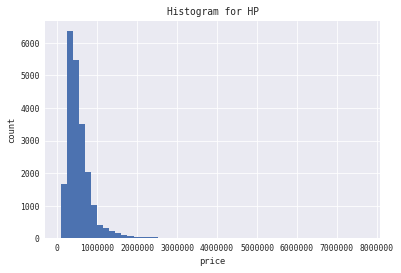

In [77]:
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram for HP')
df.price.hist(bins=50)

In [80]:
norm.fit(df.price)

(540296.5735055795, 367359.634929548)

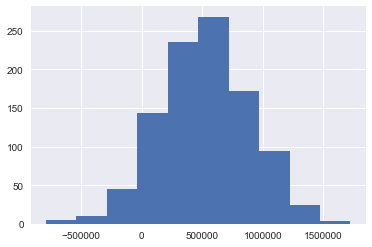

In [81]:
μ = 540296.574
σ = 367359.635
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

/Users/bikramroy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


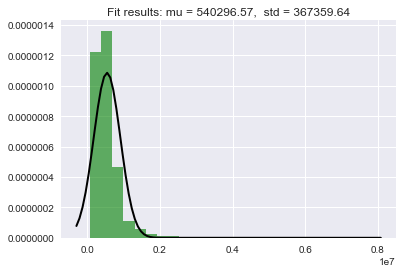

In [82]:
# Plot the histogram.
plt.hist(df.price, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

/Users/bikramroy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


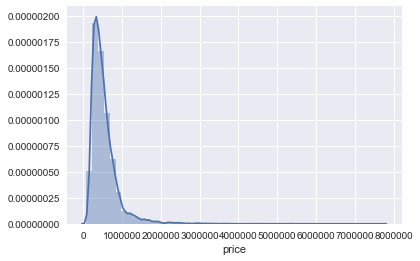

In [83]:
#Plotting a histogram using Seaborn - to check 
sns.distplot(df['price']);

In [85]:
df.describe().columns.drop(['price'])

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [89]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("df: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

df: price~id
------------------------------
['id', 0.0002812948723528441, 550107.1128004461, -2.1418173487098037e-06, 0.013708683016833841]
df: price~bedrooms
------------------------------
['bedrooms', 0.09534970283730637, 127199.51268533088, 122464.44417420359, 0.0]
df: price~bathrooms
------------------------------
['bathrooms', 0.27657672267607736, 8712.65175267159, 251241.76249515932, 0.0]
df: price~sqft_living
------------------------------
['sqft_living', 0.49268789904035104, -43988.89219422742, 280.8630143588748, 0.0]
df: price~sqft_lot
------------------------------
['sqft_lot', 0.008077735099594197, 528258.046513474, 0.7972846608151645, 5.57162202176598e-40]
df: price~floors
------------------------------
['floors', 0.06594805661983061, 279114.9959148346, 174809.0532796366, 0.0]
df: price~waterfront
------------------------------
['waterfront', 0.06985780990281942, 532286.2219943125, 1184928.504033078, 0.0]
df: price~view
------------------------------
['view', 0.154839628812

In [90]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.000,550107.113,-0.000,0.014
2,bedrooms,0.095,127199.513,122464.444,0.000
3,bathrooms,0.277,8712.652,251241.762,0.000
4,sqft_living,0.493,-43988.892,280.863,0.000
5,sqft_lot,0.008,528258.047,0.797,0.000
6,floors,0.066,279114.996,174809.053,0.000
7,waterfront,0.070,532286.222,1184928.504,0.000
8,view,0.155,496214.773,189045.800,0.000
9,condition,0.001,470868.049,20361.313,0.000


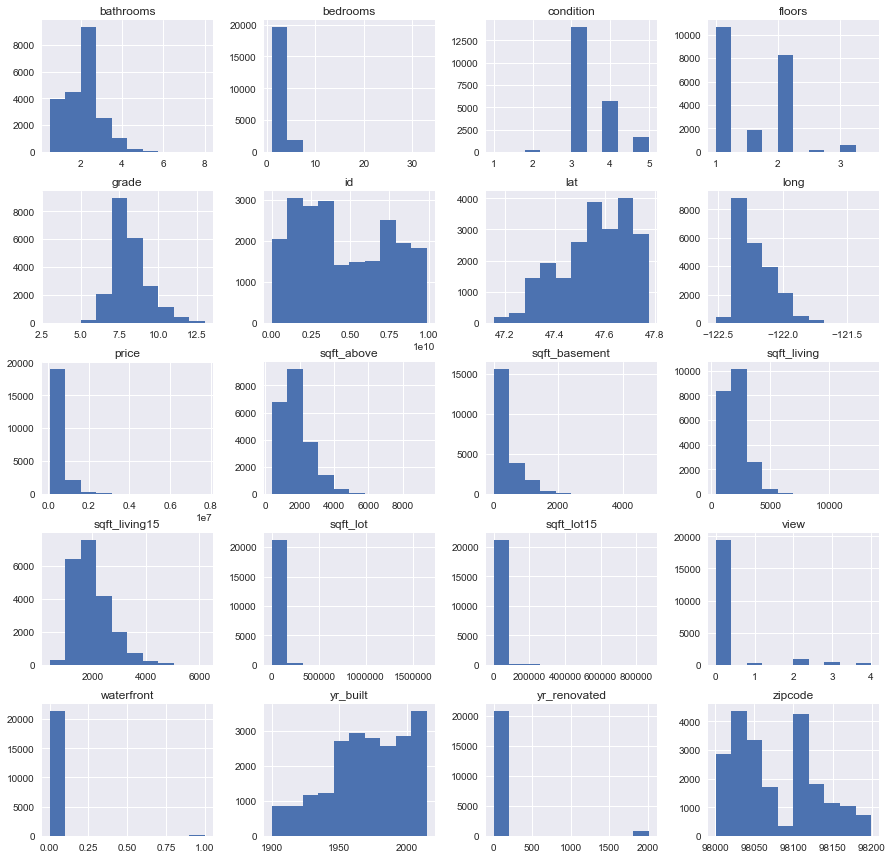

In [96]:
df.hist(figsize= [15,15]);

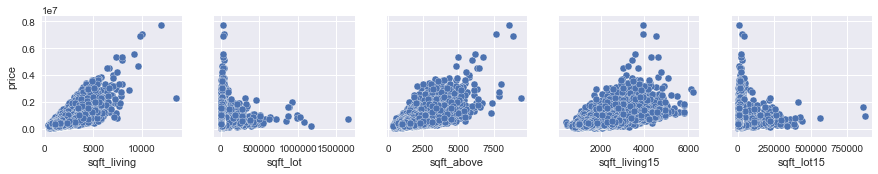

In [31]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

In [37]:
df2 = df[["price", "sqft_living"]]
df2.head()

,price,sqft_living
0,221900.000,1180
1,538000.000,2570
2,180000.000,770
3,604000.000,1960
4,510000.000,1680


In [39]:
df[df['sqft_basement'] == '?'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,12/5/2014,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,4,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,7/7/2014,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,3,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,3/23/2015,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,3,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,9/16/2014,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,4,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656


In [40]:
df['sqft_basement'] = df['sqft_basement'].str.replace('?','0')

In [41]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

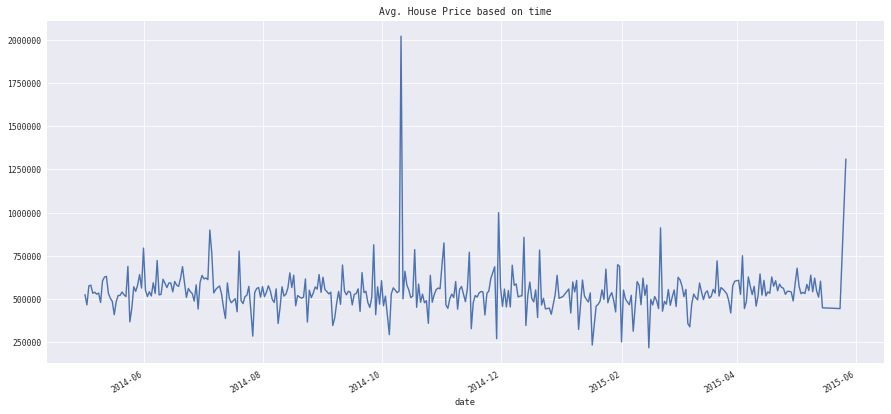

In [43]:
temp = df['price'].groupby([df['date']]).mean()
temp.index = pd.to_datetime(temp.index)
temp.plot(figsize=(15,7),title='Avg. House Price based on time')
plt.show()

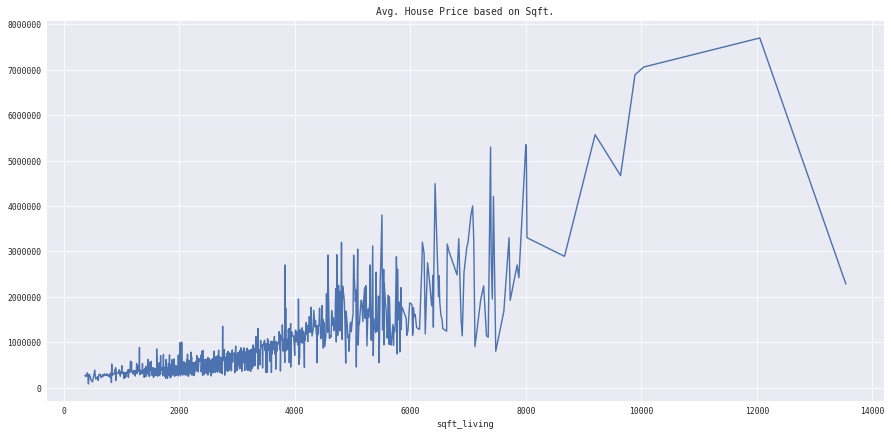

In [44]:
temp = df['price'].groupby([df['sqft_living']]).mean()
temp.plot(figsize=(15,7),title='Avg. House Price based on Sqft.')
plt.show()

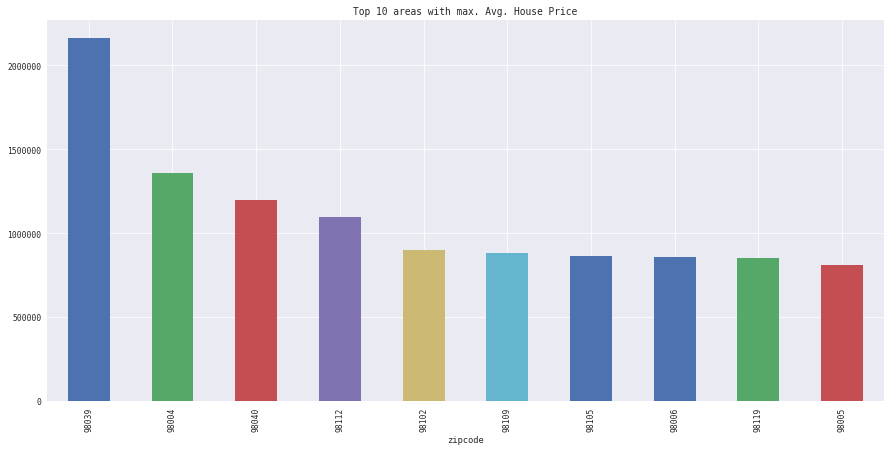

In [45]:
temp = df['price'].groupby([df['zipcode']]).mean()
temp = temp.sort_values(ascending=False)[:10]
temp.plot(kind='bar',figsize=(15,7),title='Top 10 areas with max. Avg. House Price')
plt.show()

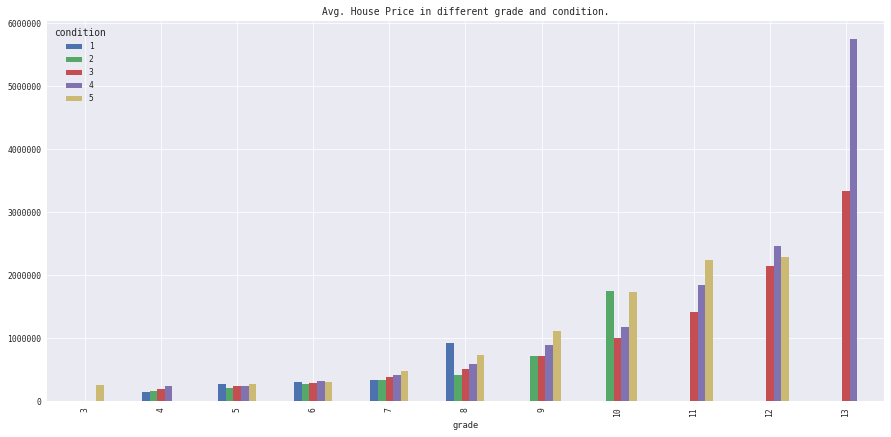

In [46]:
temp = df['price'].groupby([df['grade'], df['condition']]).mean().unstack()
temp.plot(kind='bar',figsize=(15,7),title='Avg. House Price in different grade and condition.')
plt.show()

In [48]:
df['bathrooms'] = df['bathrooms'].astype('float')
df['yr_renovated'] = df['yr_renovated'].astype('float')
df['floors'] = df['floors'].astype('float')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26ec2518>,
      dtype=object)

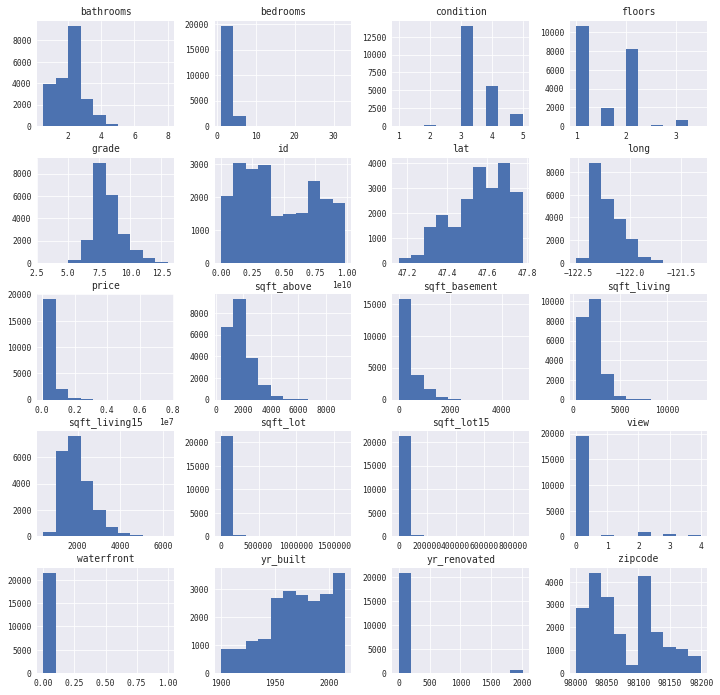

In [63]:
pd.DataFrame.hist(df,figsize=(12,12))

In [69]:
df['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64